IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

importing the dataset

In [ ]:
# dataset=pd.read_csv('housing.csv')
# dataset = pd.read_excel("HousePricePrediction.xlsx")
dataset = pd.read_csv("datasettarp.csv")


In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [ ]:
print(dataset)

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0      

In [ ]:
dataset.shape

(2919, 13)

In [ ]:
dataset.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [ ]:
dataset.isnull()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,False,False,False,False,False,False,True
2915,False,False,False,False,False,False,False,False,False,False,False,False,True
2916,False,False,False,False,False,False,False,False,False,False,False,False,True
2917,False,False,False,False,False,False,False,False,False,False,False,False,True


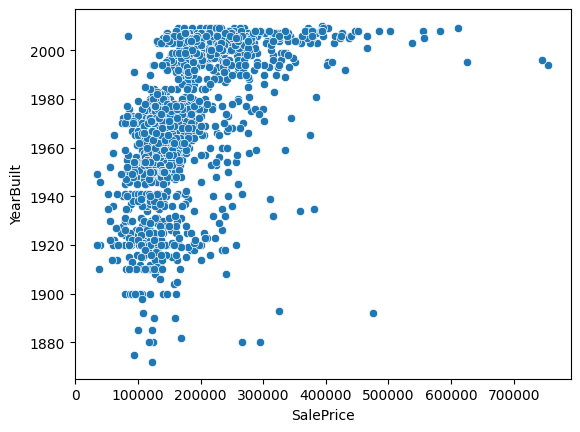

In [ ]:
#scatter plot
data = pd.read_csv("datasettarp.csv")
sns.scatterplot(x='SalePrice', y='YearBuilt', data=data,)
plt.show()

In [ ]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

DATA PREPROCESSING

--DEALING WITH THE NULL VALUES

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [ ]:
# dataset['SalePrice']=dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [ ]:
# dataset.isnull().sum()
dataset.shape

(2919, 13)

In [ ]:
new_dataset=dataset.dropna()

In [ ]:
new_dataset.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

so we can observe that there are no null values /data is cleaned

Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them.

categorical -nominal ,binary,ordinary

In [ ]:
obj=(new_dataset.dtypes=='object')
print(obj)
obj_cols=list(obj[obj].index)
print('categorical variables',len(obj_cols))

int_=(new_dataset.dtypes=='int')
int_cols=list(int_[int_].index)
print('Integer variables',len(int_cols))


float_=(new_dataset.dtypes=='float')
float_cols=list(float_[float_].index)
print('Float variables',len(float_cols))






Id              False
MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
categorical variables 4
Integer variables 6
Float variables 3


EXPLORATORY DATA ANALYSIS -EDA

<Axes: >

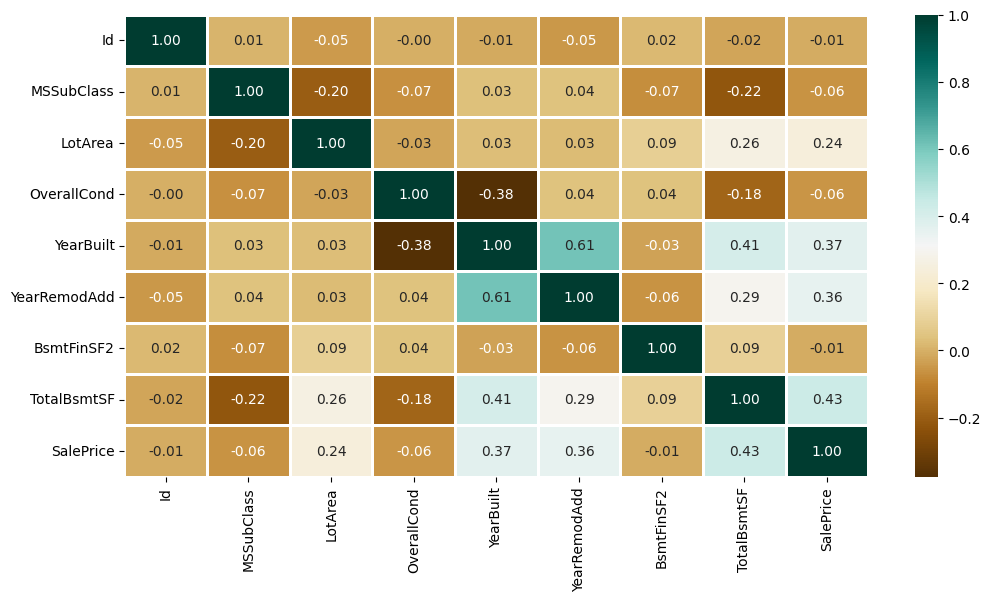

In [ ]:
#heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(new_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>


<Axes: title={'center': 'NUMBER OF UNIQUE VALUES OF CATEGORICAL FEATURES'}>

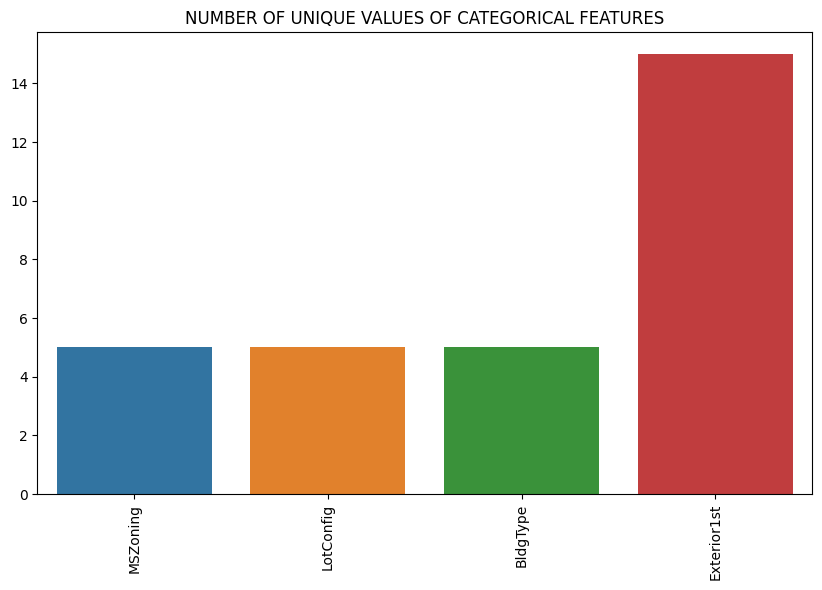

In [ ]:
from re import U
unique_values=[]

for col in obj_cols:
   unique_values.append(new_dataset[col].unique().size)

plt.figure(figsize=(10,6))
print(plt)
plt.title('NUMBER OF UNIQUE VALUES OF CATEGORICAL FEATURES')
plt.xticks(rotation=90)
sns.barplot(x=obj_cols,y=unique_values)

<ipython-input-17-4a90607473f1>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


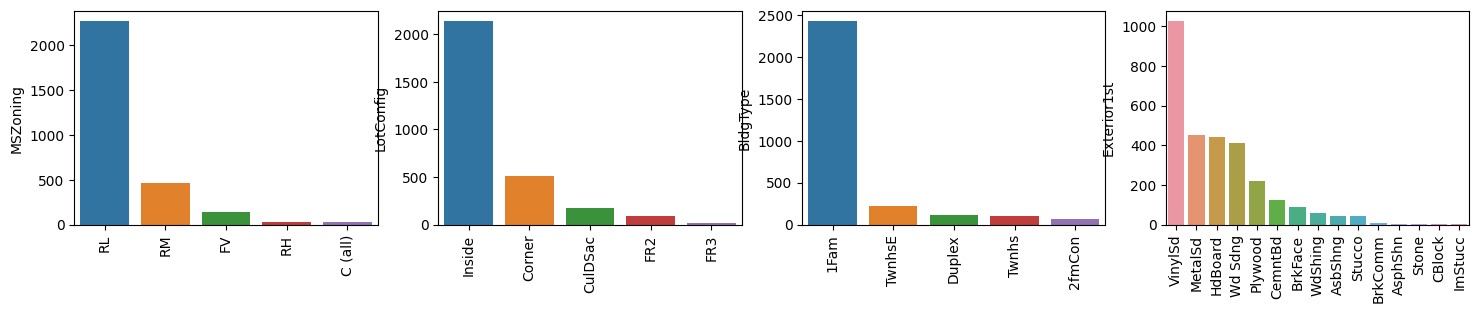

In [ ]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in obj_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

as the id column wil not participate in model training we can drop it

In [ ]:
new_dataset.drop(['Id'],
                 axis=1,
                 inplace=True)


<ipython-input-18-f174bb487bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset.drop(['Id'],


In [ ]:
new_dataset.shape

(2913, 12)

ONE HOT ENCODER

--One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [ ]:
s=(new_dataset.dtypes=='object')
# print(s)
obj_cosl=list(s[s].index)
print('categorical variables')
print(obj_cols)
print('number of categorical variables:',len(obj_cols))
# print(len(obj_cols))

categorical variables
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
number of categorical variables: 4


In [ ]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[obj_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns =OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(obj_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TRAINING TESTING AND SPLITTING

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import  train_test_split

X=df_final.drop(['SalePrice'],axis=1)
Y=df_final['SalePrice']

#split the training set into training and validization set

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)




In [ ]:
print(X.shape,X_train.shape,Y.shape,Y_train.shape,X_test.shape,Y_test.shape)

(2913, 37) (2330, 37) (2913,) (2330,) (583, 37) (583,)


In [ ]:
print(X,Y)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
...          ...      ...          ...        ...           ...         ...   
2914         160     1936            7       1970          1970         0.0   
2915         160     1894            5       1970          1970         0.0   
2916          20    20000            7       1960          1996         0.0   
2917          85    10441            5       1992          1992         0.0   
2918          60     9627            5       1993          1994         0.0   

      TotalBsmtSF  MSZoning_C (all)  MSZoning_FV  M

MODEL TRAINING

USING SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))

a=mean_absolute_percentage_error(Y_test, Y_pred)
print("error is ",a)






0.1870512931870423
error is  0.1870512931870423


USING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))





0.1903221599309408


USING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))




0.18741683841599854


USING XG BOOST REGRESSOR

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

EVALUATION

In [ ]:
training_data_pediction=model.predict(X_train)

In [ ]:
print(training_data_pediction)

[107981.125 179968.05  155765.03  ... 172054.66  167801.55  169910.44 ]


In [ ]:
#R squared error

score1=metrics.r2_score(Y_train,training_data_pediction)



print("R squared error ",score1)


R squared error  0.934114590059475


PREDICTION ON TESTING DATA

In [ ]:
testing_data_pediction=model.predict(X_test)

In [ ]:
#R squared error

score1=metrics.r2_score(Y_test,testing_data_pediction)

print(score1)


0.2294735600230341


VISULAIZING

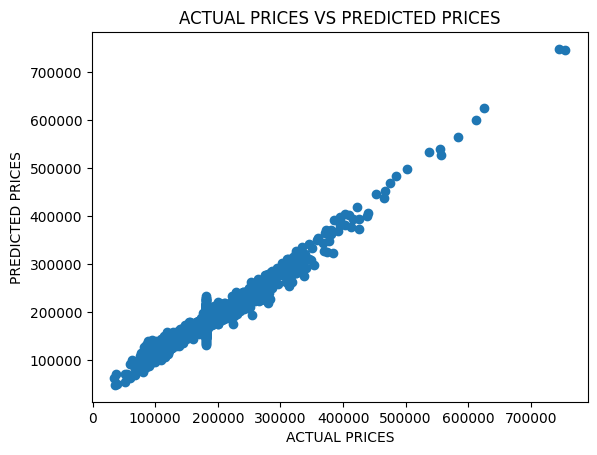

In [ ]:
plt.scatter(Y_train,training_data_pediction)
plt.xlabel("ACTUAL PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("ACTUAL PRICES VS PREDICTED PRICES")
plt.show()

------------------EXPLAINABLE  AI------------------------

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Load data
data = pd.read_csv('datasettarp.csv')

In [ ]:
# Remove rows with missing values
data.dropna(inplace=True)

In [ ]:
data.shape

(1460, 13)

In [ ]:
# Separate the features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']


In [ ]:
# Define the categorical and numerical features
categorical_features = ['MSZoning', 'LotConfig','BldgType','Exterior1st']
numerical_features = ['Id', 'MSSubClass', 'LotArea', 'OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF2','TotalBsmtSF']

In [ ]:
# Encode categorical features using one-hot encoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = preprocessor.fit_transform(X)


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train an SVM model on the housing data
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# Create a SHAP explainer object
explainer = shap.Explainer(svm, X_train)

In [ ]:
# Generate SHAP values for the test data
shap_values = explainer(X_test)

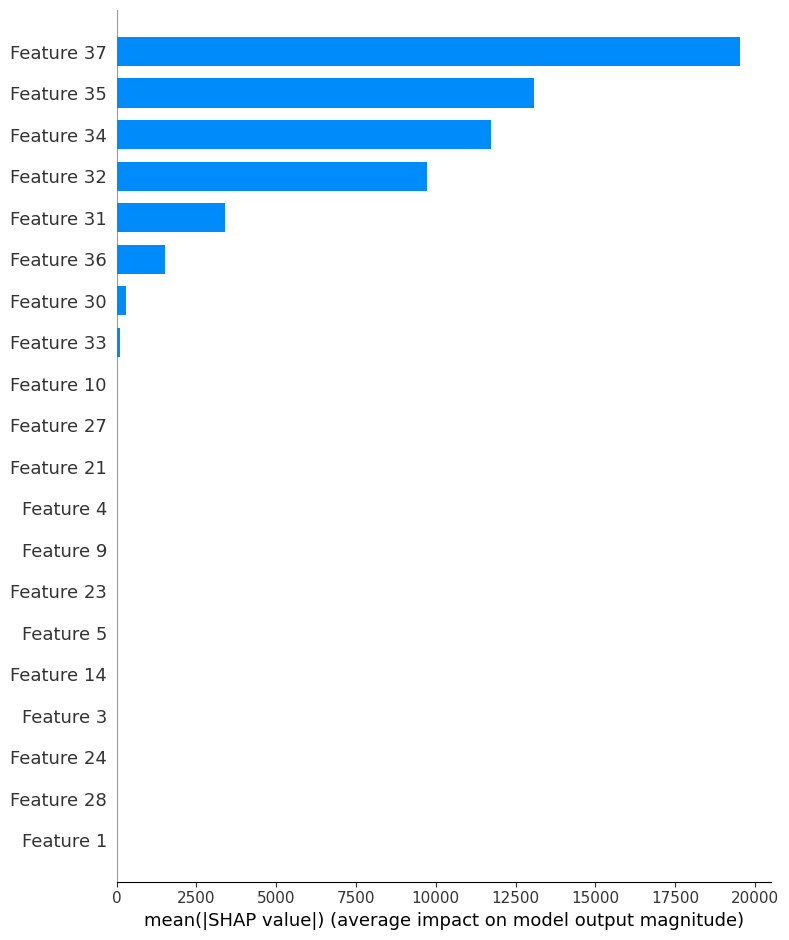

In [ ]:
# Generate summary plots of the SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
feature_names = preprocessor.get_feature_names_out()
print(feature_names)
print(len(feature_names))
# print(feature_names[35])

['cat__MSZoning_C (all)' 'cat__MSZoning_FV' 'cat__MSZoning_RH'
 'cat__MSZoning_RL' 'cat__MSZoning_RM' 'cat__LotConfig_Corner'
 'cat__LotConfig_CulDSac' 'cat__LotConfig_FR2' 'cat__LotConfig_FR3'
 'cat__LotConfig_Inside' 'cat__BldgType_1Fam' 'cat__BldgType_2fmCon'
 'cat__BldgType_Duplex' 'cat__BldgType_Twnhs' 'cat__BldgType_TwnhsE'
 'cat__Exterior1st_AsbShng' 'cat__Exterior1st_AsphShn'
 'cat__Exterior1st_BrkComm' 'cat__Exterior1st_BrkFace'
 'cat__Exterior1st_CBlock' 'cat__Exterior1st_CemntBd'
 'cat__Exterior1st_HdBoard' 'cat__Exterior1st_ImStucc'
 'cat__Exterior1st_MetalSd' 'cat__Exterior1st_Plywood'
 'cat__Exterior1st_Stone' 'cat__Exterior1st_Stucco'
 'cat__Exterior1st_VinylSd' 'cat__Exterior1st_Wd Sdng'
 'cat__Exterior1st_WdShing' 'remainder__Id' 'remainder__MSSubClass'
 'remainder__LotArea' 'remainder__OverallCond' 'remainder__YearBuilt'
 'remainder__YearRemodAdd' 'remainder__BsmtFinSF2'
 'remainder__TotalBsmtSF']
38


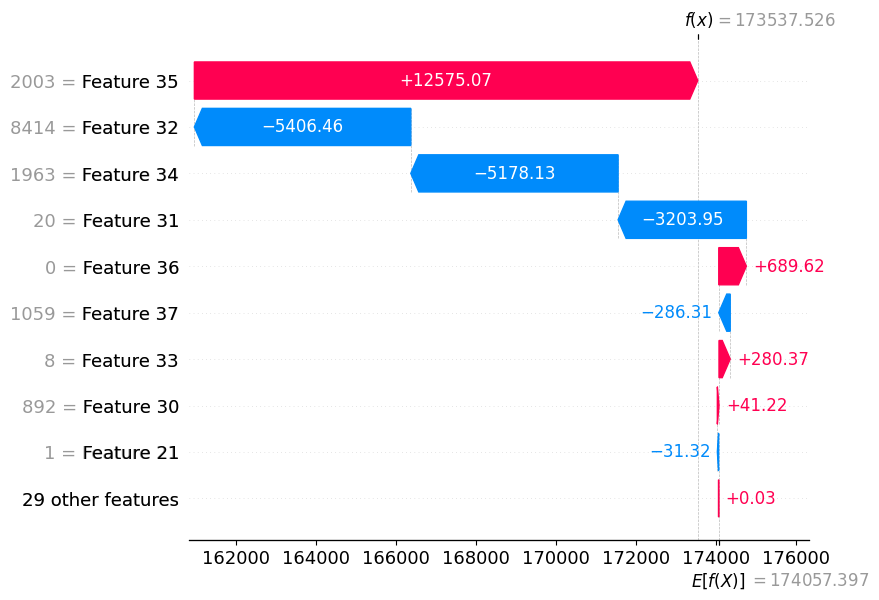

In [ ]:
# Visualize the SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])

In the summary plot, each feature is assigned a unique color based on their magnitude of effect on the model's output. Features with a positive effect are shown in red, while those with a negative effect are shown in blue. The magnitude of the effect is indicated by the position on the y-axis.

Regarding the feature numbering, it's possible that the number displayed in the summary plot doesn't correspond exactly to the column or row number in your original data. This is because the column transformer used for encoding categorical features can create new columns, so the original column index may have been shifted. It's also possible that the row number displayed in the summary plot corresponds to the index in the pandas dataframe, rather than the row number in the original CSV file.

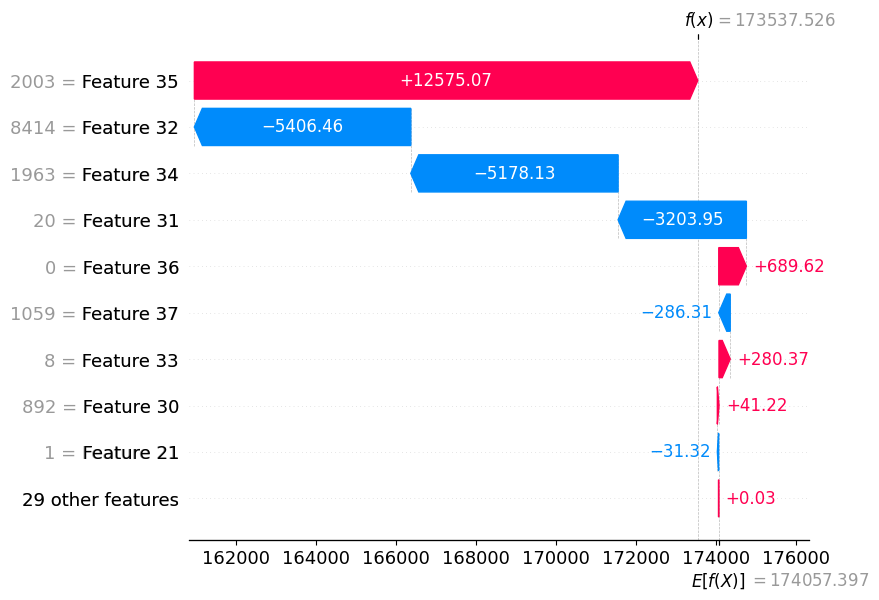

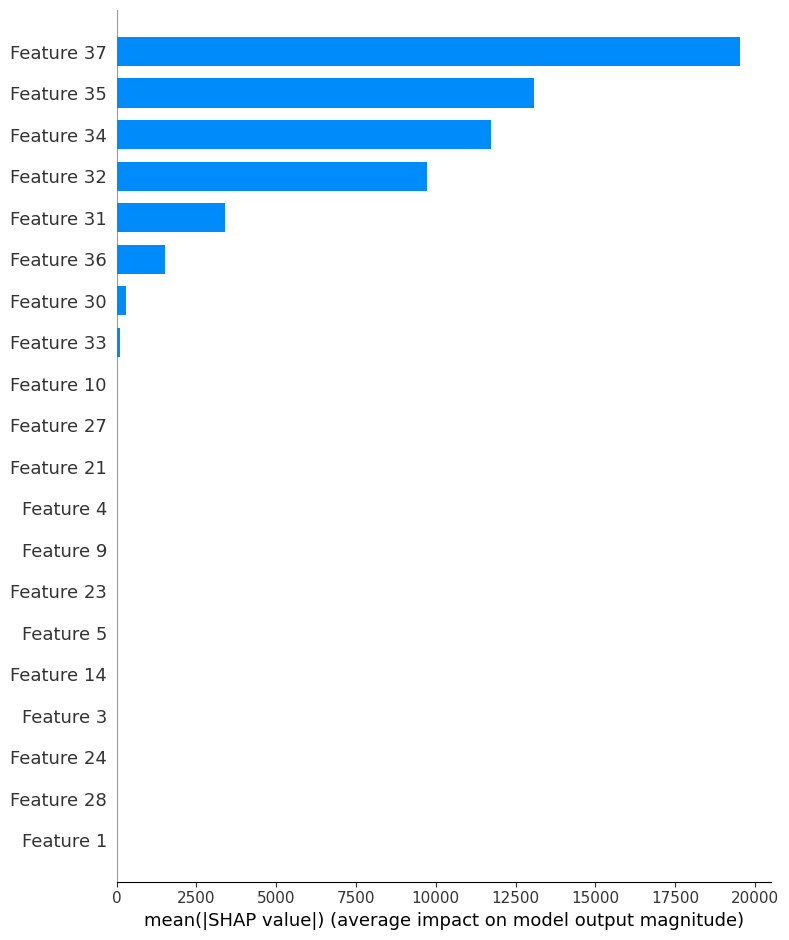

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('datasettarp.csv')

# Remove rows with missing values
data.dropna(inplace=True)

# Separate the features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Define the categorical and numerical features
categorical_features = ['MSZoning', 'LotConfig','BldgType','Exterior1st']
numerical_features = ['Id', 'MSSubClass', 'LotArea', 'OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF2','TotalBsmtSF']

# Encode categorical features using one-hot encoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = preprocessor.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model on the housing data
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(svm, X_train)

# Generate SHAP values for the test data
shap_values = explainer(X_test)

# Visualize the SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])

# Generate summary plots of the SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')


BY FILLING THE MISSING VALUES

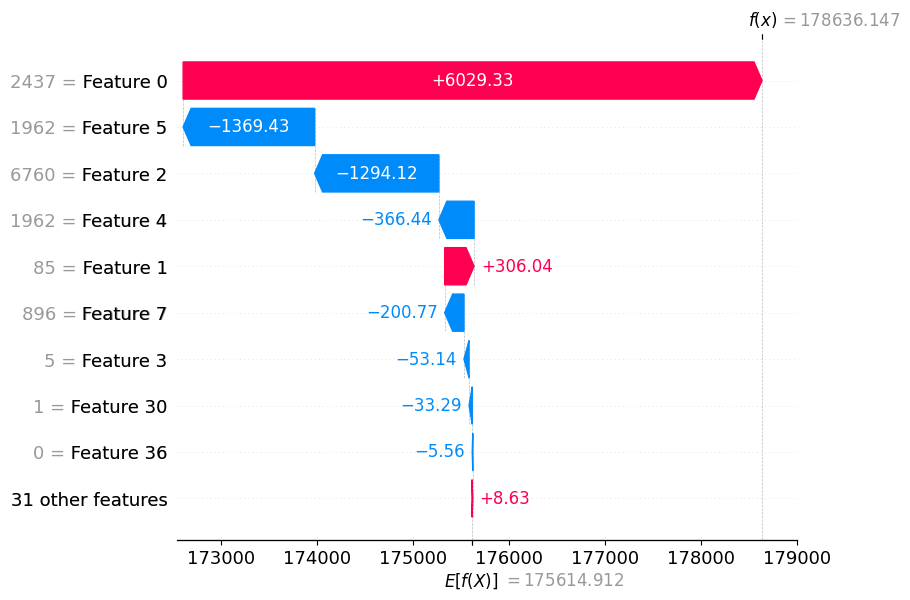

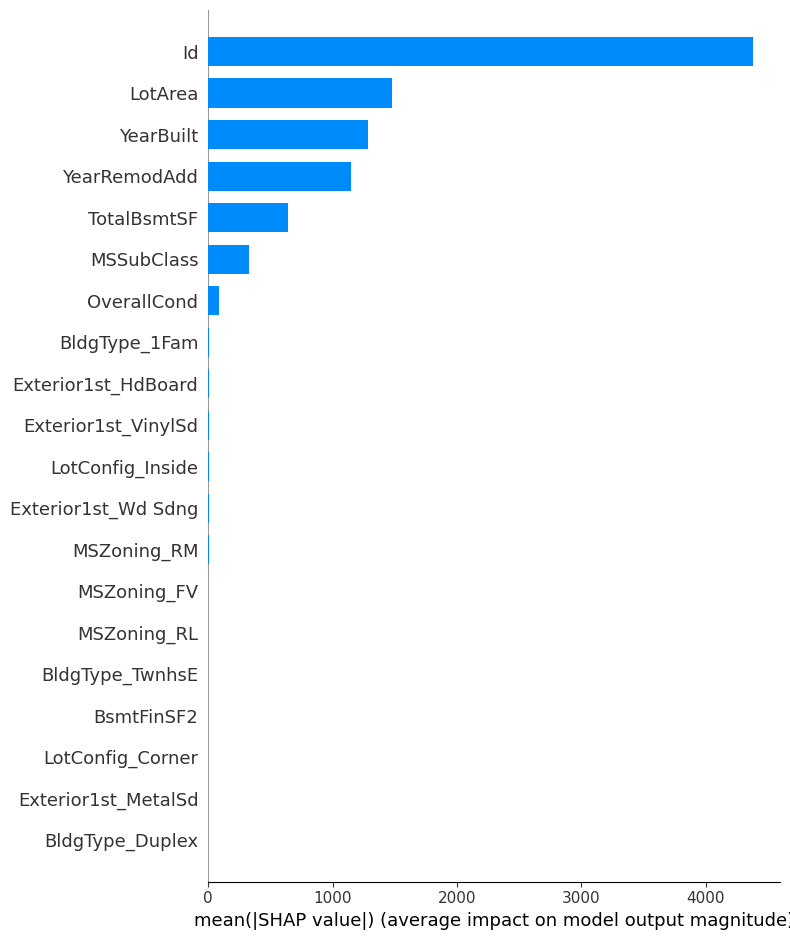

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('datasettarp.csv')

# Separate the features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']


y = y.fillna(y.mean())

# Define the categorical and numerical features
categorical_features = ['MSZoning', 'LotConfig','BldgType','Exterior1st']
numerical_features = ['Id', 'MSSubClass', 'LotArea', 'OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF2','TotalBsmtSF']

# Define a pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# Define a pipeline for categorical features
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Combine the numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

# Apply preprocessing to the data
X = preprocessor.fit_transform(X)

# Get the feature names
feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine the numerical and categorical feature names
feature_names = np.concatenate((numerical_features, feature_names))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model on the housing data
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(svm, X_train)

# Generate SHAP values for the test data
shap_values = explainer(X_test)

# Visualize the SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])

# Generate summary plots of the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type='bar')
